In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


In [2]:
data = fetch_ucirepo(id=468)

X = pd.DataFrame(data.data.features)
y = pd.Series(data.data.targets.values.ravel(), name='Revenue')

#codificação de variáveis categóricas

X_encoded = X.copy()
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])

#divisão dos dados - 80/20
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

#normalização dos dados

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
#definição e configuração do MLP e hiperparametros

mlp = MLPClassifier()
params = {
    'hidden_layer_sizes': [(100, 150),(50,100)],
    'activation': ['relu','tanh','logistic'],
    'learning_rate_init': [0.001,0.0001],
    'alpha': [0.01,0.001],
    'solver': ['adam']
    'max_iter': [500],
    'early_stopping': [True]
}
gs_mlp = GridSearchCV(mlp, params, cv = 3, verbose = 3,scoring = 'accuracy')

gs_mlp.fit(X_train, y_train)
print("Best parameters:\n", gs_mlp.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500;, score=0.900 total time=   2.3s
[CV 2/3] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500;, score=0.898 total time=   1.5s
[CV 3/3] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500;, score=0.891 total time=   2.3s
[CV 1/3] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500;, score=0.886 total time=   2.1s
[CV 2/3] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500;, score=0.896 total time=   4.0s
[CV 3/3] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(100, 150), learning_rate

In [10]:
optimized_mlp = MLPClassifier(
    hidden_layer_sizes = (50, 100),
    activation = 'tanh',
    alpha = 0.01,
    learning_rate_init = 0.001,
    max_iter = 600,
    solver = 'adam',
    verbose = True
)
optimized_mlp.fit(X_train, y_train)
optimized_mlp_pred = optimized_mlp.predict(X_test)

Iteration 1, loss = 0.37499596
Iteration 2, loss = 0.28831762
Iteration 3, loss = 0.28611019
Iteration 4, loss = 0.28165190
Iteration 5, loss = 0.27897898
Iteration 6, loss = 0.27501368
Iteration 7, loss = 0.27015734
Iteration 8, loss = 0.26596183
Iteration 9, loss = 0.26155759
Iteration 10, loss = 0.25883882
Iteration 11, loss = 0.25498311
Iteration 12, loss = 0.25212119
Iteration 13, loss = 0.25052381
Iteration 14, loss = 0.24884419
Iteration 15, loss = 0.24810638
Iteration 16, loss = 0.24677751
Iteration 17, loss = 0.24513277
Iteration 18, loss = 0.24418303
Iteration 19, loss = 0.24371329
Iteration 20, loss = 0.24309994
Iteration 21, loss = 0.24192895
Iteration 22, loss = 0.24138639
Iteration 23, loss = 0.24035156
Iteration 24, loss = 0.23962858
Iteration 25, loss = 0.23842874
Iteration 26, loss = 0.23735324
Iteration 27, loss = 0.23643581
Iteration 28, loss = 0.23601992
Iteration 29, loss = 0.23458442
Iteration 30, loss = 0.23469339
Iteration 31, loss = 0.23420929
Iteration 32, los


🔍 Matriz de Confusão:
[[1935  149]
 [ 178  204]]

📊 Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.92      0.93      0.92      2084
        True       0.58      0.53      0.56       382

    accuracy                           0.87      2466
   macro avg       0.75      0.73      0.74      2466
weighted avg       0.86      0.87      0.87      2466


✅ Acurácia: 0.8674


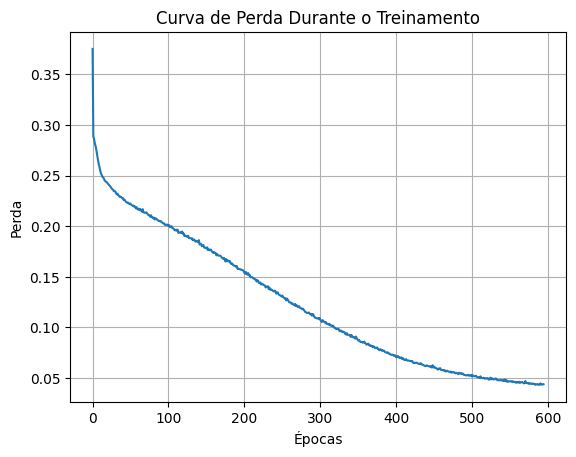

In [11]:
print("\n🔍 Matriz de Confusão:")
print(confusion_matrix(y_test, optimized_mlp_pred))

print("\n📊 Relatório de Classificação:")
print(classification_report(y_test, optimized_mlp_pred))

print(f"\n✅ Acurácia: {accuracy_score(y_test, optimized_mlp_pred):.4f}")

#Curva de perda
plt.plot(optimized_mlp.loss_curve_)
plt.title("Curva de Perda Durante o Treinamento")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.grid(True)
plt.show()